# 2. Incomplete, Positive-Only Labels

(a) 노트 참고

(b) 노트 참고

(c)

In [1]:
#  기본 모듈 import

import numpy as np
import src.util as util
from src.linear_model import LinearModel

In [2]:
# 데이터 로드

x_train, y_train = util.load_dataset('data/ds3_train.csv', add_intercept=True)
_, t_train = util.load_dataset('data/ds3_train.csv', label_col='t')
x_valid, y_valid = util.load_dataset('data/ds3_valid.csv', add_intercept=True)
_, t_valid = util.load_dataset('data/ds3_valid.csv', label_col='t')
x_test, y_test = util.load_dataset('data/ds3_test.csv', add_intercept=True)
_, t_test = util.load_dataset('data/ds3_test.csv', label_col='t')

In [22]:
# Logistic Regression Classifier 정의

class LogisticRegression(LinearModel):
    
    # Gradient 계산
    def fit(self, x, y):

        # Logistic Function
        def h(theta, x):
            return 1 / (1 + np.exp(-np.dot(x, theta)))

        # Gradient 계산
        def gradient(theta, x, y):
            m, _ = x.shape
            return -1 / m * np.dot(x.T, (y - h(theta, x)))

        # Hessian 계산
        def hessian(theta, x):
            
            m, _ = x.shape
            h_theta_x = np.reshape(h(theta, x), (-1, 1))
            return 1 / m * np.dot(x.T, h_theta_x * (1 - h_theta_x) * x)

        # Theta 업데이트
        def getNextTheta(theta, x, y):
            return theta - np.dot(np.linalg.inv(hessian(theta, x)), gradient(theta, x, y))
        
        # 데이터 차원 정의
        m, n = x.shape

        # Theta 초기화
        if self.theta is None:
            self.theta = np.zeros(n)

        # Newton's Method
        old_theta = self.theta
        new_theta = getNextTheta(self.theta, x, y)
        while np.linalg.norm(new_theta - old_theta, 1) >= self.eps:
            old_theta = new_theta
            new_theta = getNextTheta(old_theta, x, y)

        self.theta = new_theta
    
    # 예측
    def predict(self, x):
        
        # 행렬 곱을 통한 예측
        return x @ self.theta >= 0


In [23]:
# t 라벨 사용

log_reg = LogisticRegression()
log_reg.fit(x_train, t_train)

Theta: [-0.9711418   2.73208784  1.07403478], Accuracy: 0.9632


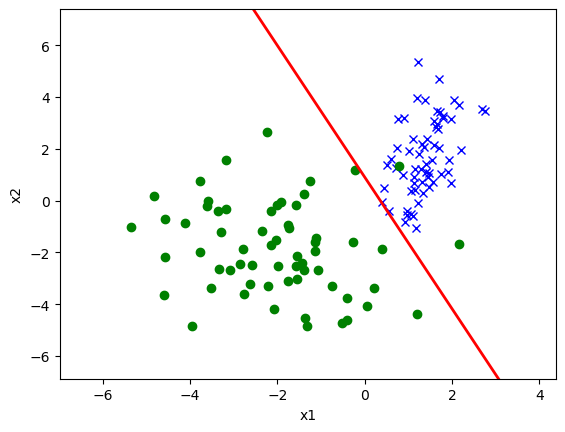

In [24]:
# 결과 출력

util.plot(x_test, t_test, log_reg.theta)
print("Theta: " + str(log_reg.theta) + ", Accuracy: " + str(np.mean(t_train == log_reg.predict(x_train))))

(d)

In [25]:
# t 라벨 사용 불가능! 대신 y 라벨 사용

log_reg = LogisticRegression()
log_reg.fit(x_train, y_train)

Theta: [-2.91607454  0.78596651  0.09282768], Accuracy: 0.9


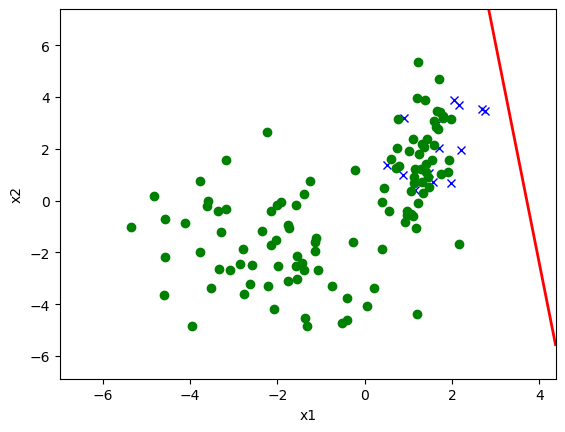

In [26]:
# 결과 출력

util.plot(x_test, y_test, log_reg.theta)
print("Theta: " + str(log_reg.theta) + ", Accuracy: " + str(np.mean(y_train == log_reg.predict(x_train))))

(e)

In [ ]:
# Logistic 클래스에서 h 함수 가져오기

def h(theta, x):
    return 1 / (1 + np.exp(-np.dot(x, theta)))

In [ ]:
# alpha 추정

v_p = x_valid[y_valid == 1]
alpha = h(log_reg.theta, v_p).mean()

In [ ]:
# Logistic 클래스에서 predict 함수 가져와 alpha를 이용하도록 코드 수정

def predict(theta, x):
    return h(theta, x) / alpha >= 0.5

이후 과정은 진행하지 못했습니다.